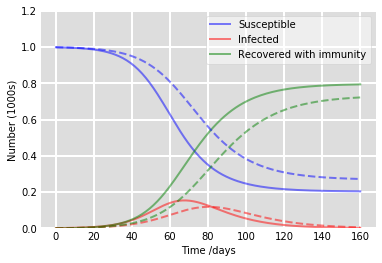

68826.0
54077.0


In [21]:
#credits to https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/
#modifications by author Bernd Mader

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.integrate as it

# Total population, N.
N = 1000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.2, 1./10 
beta2 = 0.18
# A grid of time points (in days)
t = np.linspace(0, 160, 160)

# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dSdtlow = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dIdtlow = beta2 * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
retlow = odeint(deriv, y0, t, args=(N, beta2, gamma))
S, I, R = ret.T
Slow, Ilow, Rlow = retlow.T

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'g', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, Slow/1000, 'b', alpha=0.5, lw=2, ls = '--')
ax.plot(t, Ilow/1000, 'r', alpha=0.5, lw=2, ls = '--')
ax.plot(t, Rlow/1000, 'g', alpha=0.5, lw=2, ls = '--')
ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()
Rhigh = it.cumtrapz(R,initial=0)[-1]
Rlow = it.cumtrapz(Rlow,initial=0)[-1]
print(round(Rhigh))
print(round(Rlow))